In [24]:
import os
#import poppy
import astropy.units as u
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import numpy as np
from astropy import convolution as conv
from matplotlib.colors import LinearSegmentedColormap,SymLogNorm
zero_color = 'white'
norm=SymLogNorm(6e-9)#,vmin=-1e-3,vmax=1e-3)
semi_sym_cm = LinearSegmentedColormap.from_list('my cmap', 
                                                ['black',
                                                 zero_color,
                                                 'purple'])
import matplotlib as mpl
#import poppy


mpl.rcParams['hatch.linewidth'] = 0.2  # previous pdf hatch linewidth
#mpl.rcParams[.linewidth'] = 0.2  # previous pdf hatch linewidth
%matplotlib inline
plt.rcParams["font.serif"]='serif'
mpl.rcParams["image.origin"]="lower"

#plt.rcParams["pdf.fonttype"]=42


home=os.path.expanduser('~')

#setup parameters and load data from Bin Ren which is in units of counts/sec
local_data_dir=home+ "/projects/epseri/data/"#8896/bin_ren/"
data_dir=home+ "/Box/HST-EpsEri/Reduced/"#8896/bin_ren/"
fig_dir=home+"/projects/epseri/HST_reduction/Eps-Eri-HST-Observation-Initial-Write-up/"


PIXELSCL=0.05071*u.arcsecond

In [25]:
300* 1.8472400E-06/.07565**2,20*0.1765e-3


(0.09683374185130064, 0.00353)

In [26]:
#klip_2018=fits.open(data_dir+"KLIP_component50_median_shortexp.fits")
#klip_2018[0].header["PIXELSCL"]=PIXELSCL.value#=0.05071

#klip_fn    ="-DEL-ERI_reducedSlices_10components_klip.fits"
klip_fn ="-EPS-ERI_reducedSlices_20components_klip_withdelta.fits"
nmf_fnwo="new_archive_no_delta/-EPS-ERI_reducedSlices_10components.fits"
#nmf_fnD_wo="new_archive_no_delta/-DEL-ERI_reducedSlices_10components.fits"


nmf_fn="new_archive_with_delta/-EPS-ERI_reducedSlices_10components.fits"
nmf_fn2021="AllEE307_nmf_nuAllResidFRbo.fits"

#nmf_fn2021="cleansheet_nuFRRAbo.fits"



nmf_fn=nmf_fn2021

#nmf_fn="new_archive_with_delta/-EPS-ERI_reducedSlices_10components.fits"


#nmf_fn2018="EpsEri_50refs5componentsFromDeltaONLY_NMFslices.fits"
nmf_fn = nmf_fn#D_wo

#nmf_fn=klip_fn
klip_cube_2019=fits.open(local_data_dir+klip_fn)
nmf_cube_2019=fits.open(local_data_dir+nmf_fn)

nmf_cube_2021=fits.open(local_data_dir+nmf_fn)
nmf_cube_2021[0].header["PIXELSCL"]=0.05071



nmf_cube_wo=fits.open(local_data_dir+nmf_fnwo)



#nmf_cube_2018=fits.open(local_data_dir+nmf_fn2018)

#klip_cube_2018=fits.open(local_data_dir+klip_fn)

#esd_classical_2018 = fits.open("class_sub_cut_med.fits")
klip=fits.open(local_data_dir+"w1.8klip.fits")

#klip_cube_2018[0].data.shape
print(nmf_cube_2019[0].data.shape,nmf_cube_wo[0].data.shape)


(552, 239, 239) (564, 567, 567)


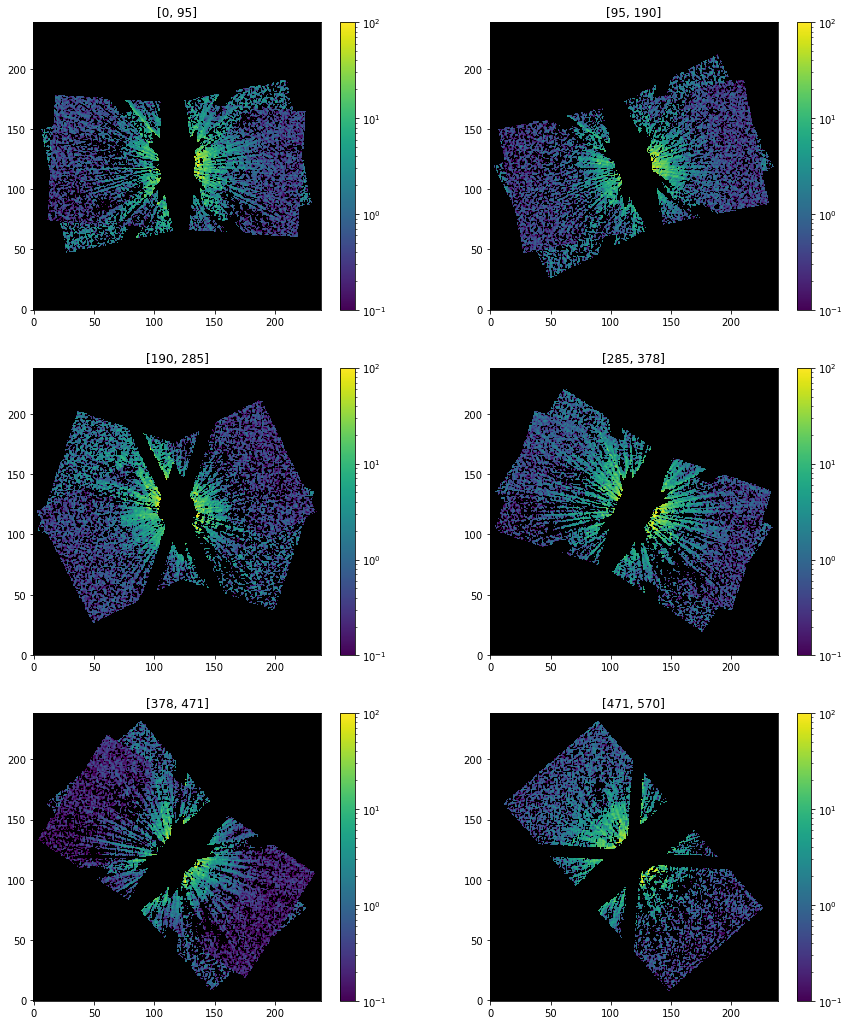

In [27]:
breaks=[0,95,95*2,95*3,95*4-2,95*5-4,95*6]
import matplotlib
plt.figure(figsize=[15,18])
vmin=np.nanmean(nmf_cube_2019[0].data)-np.nanstd(nmf_cube_2019[0].data)*5
vmax=np.nanmean(nmf_cube_2019[0].data)+np.nanstd(nmf_cube_2019[0].data)*5
visit=np.empty([6,nmf_cube_2019[0].data.shape[1],nmf_cube_2019[0].data.shape[2]])
for i in range(1,len(breaks)):
    plt.subplot(int("3"+"2"+str(i)))
    plt.title(str([breaks[i-1],breaks[i]]))
    current_cmap=matplotlib.cm.get_cmap().copy()
    current_cmap.set_bad(color="k")
    visit[i-1,:,:]=np.nanmedian(nmf_cube_2019[0].data[breaks[i-1]:breaks[i],:,:],axis=0,
                           )
    
    plt.imshow(visit[i-1,:,:],    norm=matplotlib.colors.LogNorm(0.1,100),
               #cmap=plt.cm.magma,
               #vmin=0.1,vmax=100
              )
    plt.colorbar()

/tmp/ipykernel_9898/2359813701.py:4: RuntimeWarning: Mean of empty slice
  plt.imshow(np.nanmean(visit[:3],axis=0),vmax=20,vmin=0,interpolation="nearest")
/tmp/ipykernel_9898/2359813701.py:7: RuntimeWarning: Mean of empty slice
  plt.imshow(np.nanmean(visit[3:],axis=0),vmax=20,vmin=0,interpolation="nearest")


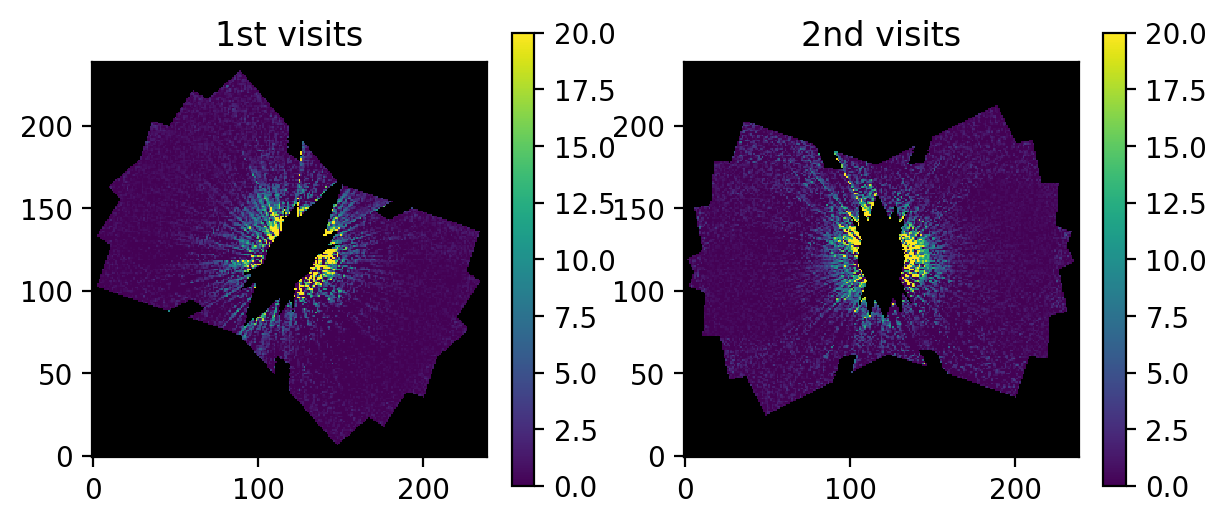

In [28]:
plt.figure(figsize=[7,3],dpi=200)
plt.subplot(122)
plt.title("2nd visits")
plt.imshow(np.nanmean(visit[:3],axis=0),vmax=20,vmin=0,interpolation="nearest")
plt.colorbar()
plt.subplot(121)
plt.imshow(np.nanmean(visit[3:],axis=0),vmax=20,vmin=0,interpolation="nearest")
plt.title("1st visits")

plt.colorbar()
plt.savefig(fig_dir+"figures/two_visits.pdf",bbox_inches="tight")

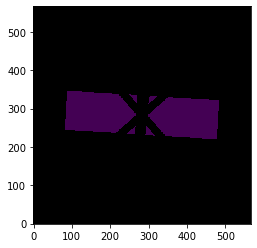

In [29]:
plt.imshow(fits.getdata("/home/edouglas/projects/epseri/data/new_archive_no_delta/masks_-EPS-ERI_wide.fits")[0,:,:])

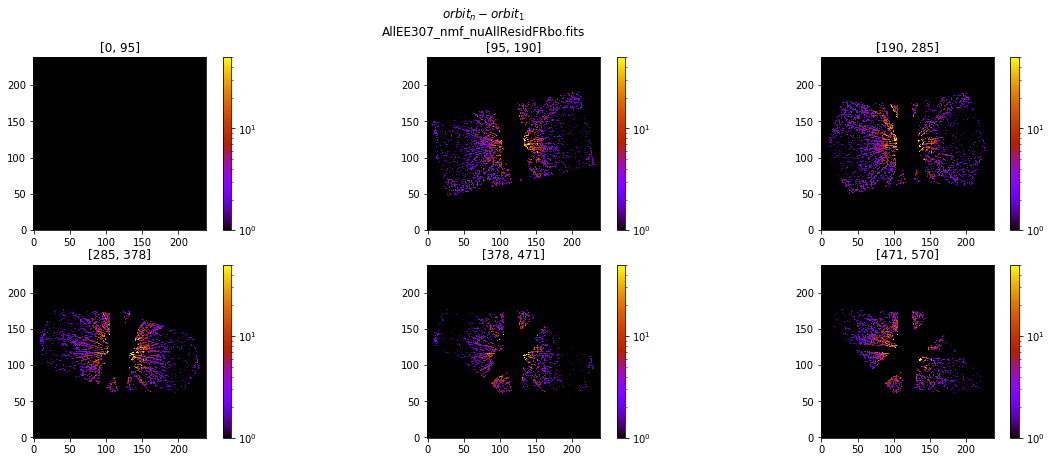

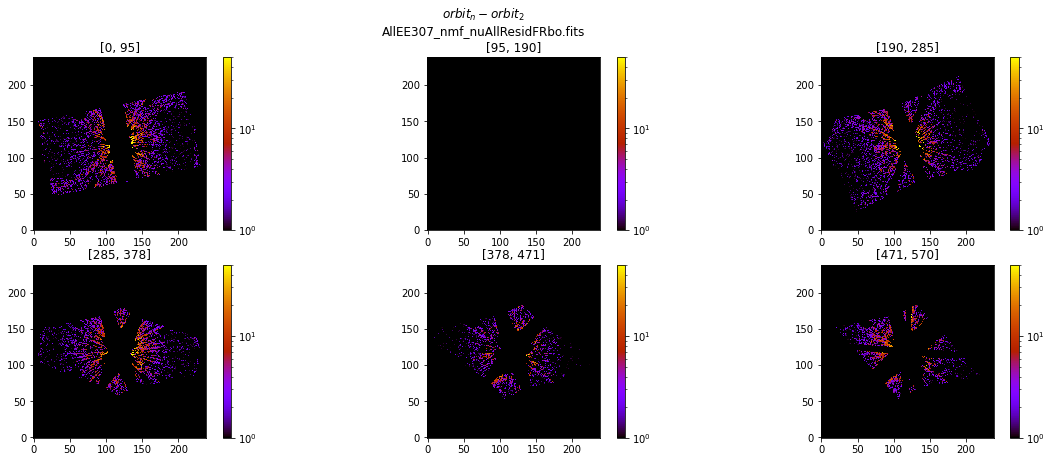

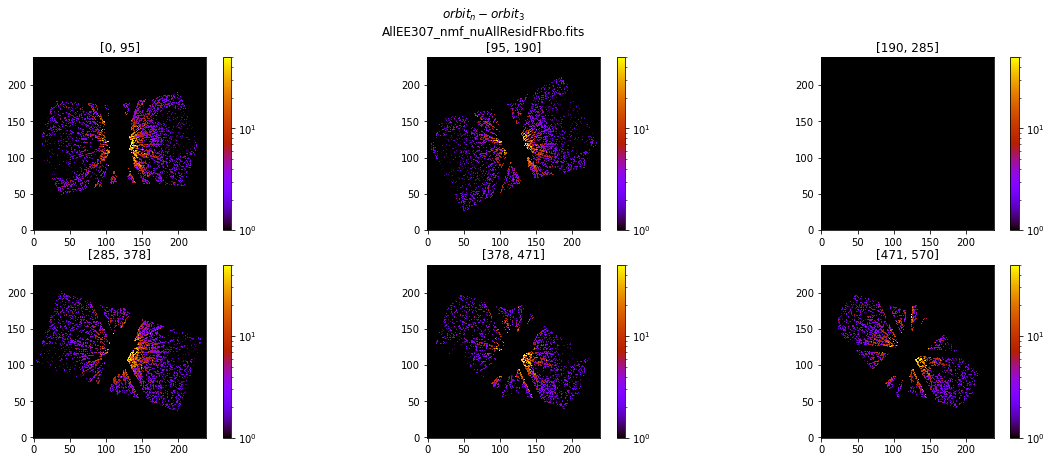

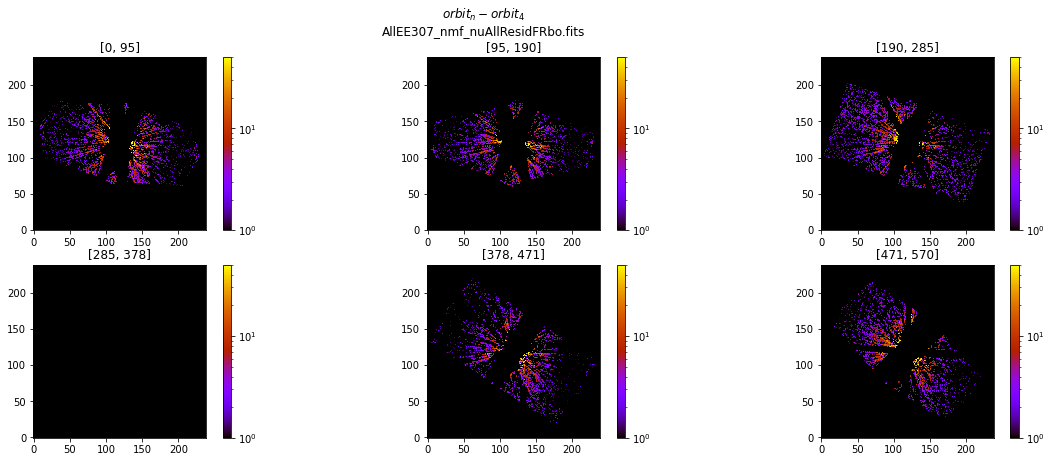

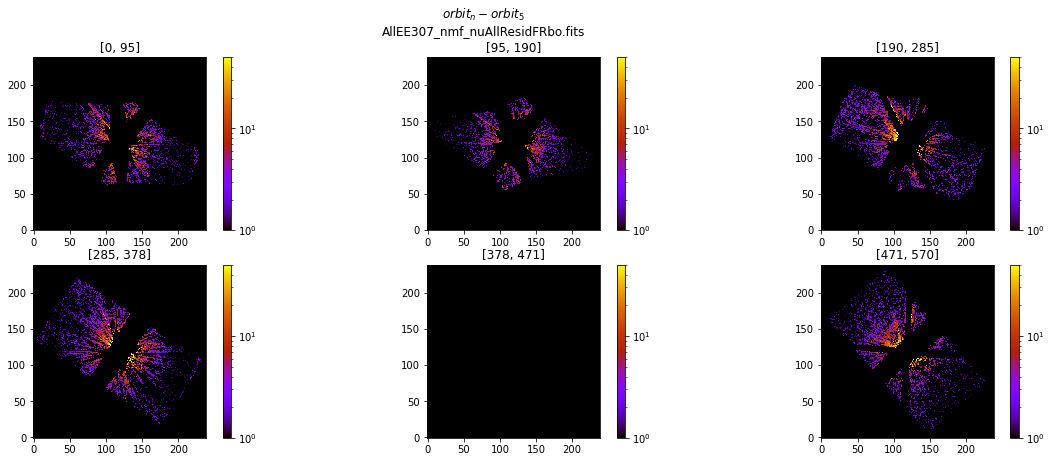

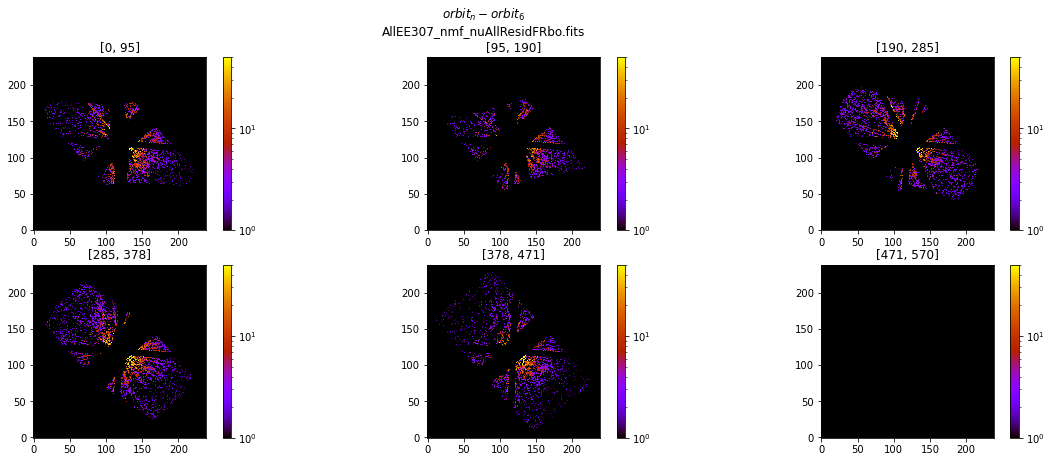

In [30]:
pairset=set()
for j in range(1,len(breaks)):
    plt.figure(figsize=[20,7])

    for i in range(1,len(breaks)):

        plt.subplot(int("2"+"3"+str(i)))
        plt.title(str([breaks[i-1],breaks[i]]))
        current_cmap=matplotlib.cm.gnuplot.copy()#matplotlib.cm.get_cmap()
        current_cmap.set_bad(color="k")
        #print(i)
        delta=visit[i-1,:,:]-visit[j-1,:,:]
        plt.imshow(delta,    norm=matplotlib.colors.LogNorm(1,50),
               cmap=current_cmap,interpolation="nearest",
                  )
        plt.colorbar()
        '''fits.writeto(local_data_dir+"/{}-{}".format(i,j)+"."+nmf_fn,
                     data=delta,
                     header=klip_2018[0].header,overwrite=True)'''
    plt.suptitle("$orbit_n-orbit_{}$".format(j)+"\n"+nmf_fn)
    plt.savefig(fig_dir+"figures/n-{}".format(j)+"."+nmf_fn.replace("/","_")+".pdf",bbox_inches="tight")

In [31]:
'''plt.figure(dpi=500)#figsize=[20,7])
pairset=set()
marker='-'
for j in range(1,len(breaks)):
    plt.title("Orbit differences:\n"+nmf_fn)
    for i in range(1,len(breaks)):
            if (str(i)+str(j) not in pairset) or (str(j)+str(i) not in pairset):
                pairset.add(str(i)+str(j))
                pairset.add(str(j)+str(i))
                #print(pairset)
            else:
                #print("skipping repeat")
                continue
            if (i==j):
                continue
            if (j>4) or (i>4):
                marker=".-"
            else:
                marker='-'
            print(local_data_dir+"/"+nmf_fn)

            #delta=fits.open(local_data_dir+"/{}-{}".format(i,j)+"."+nmf_fn)
            delta=fits.open(local_data_dir+"/"+nmf_fn)
            delta[0].header["PIXELSCL"]=PIXELSCL.value


            #plt.subplot("2"++"3"+str(i))
            center=(((delta[0].data.shape[1]-1)/2.),
            ((delta[0].data.shape[0]-1)/2.))
            radial = poppy.utils.radial_profile(delta,
                                           center=center,
                                           stddev=True)*u.count
            plt.plot(radial[0],radial[1],marker,
                     linewidth=i*.8,alpha=.4,label=str([j,i]))

plt.yscale("log")
plt.xlim([0.5,3])
plt.ylim(1,200)
plt.xlabel("as")
plt.ylabel("radial STDEV")
plt.legend(fontsize=8,loc="upper right")
plt.savefig("figs/orbit_diff"+nmf_fn+".png",bbox_inches="tight")'''

'plt.figure(dpi=500)#figsize=[20,7])\npairset=set()\nmarker=\'-\'\nfor j in range(1,len(breaks)):\n    plt.title("Orbit differences:\n"+nmf_fn)\n    for i in range(1,len(breaks)):\n            if (str(i)+str(j) not in pairset) or (str(j)+str(i) not in pairset):\n                pairset.add(str(i)+str(j))\n                pairset.add(str(j)+str(i))\n                #print(pairset)\n            else:\n                #print("skipping repeat")\n                continue\n            if (i==j):\n                continue\n            if (j>4) or (i>4):\n                marker=".-"\n            else:\n                marker=\'-\'\n            print(local_data_dir+"/"+nmf_fn)\n\n            #delta=fits.open(local_data_dir+"/{}-{}".format(i,j)+"."+nmf_fn)\n            delta=fits.open(local_data_dir+"/"+nmf_fn)\n            delta[0].header["PIXELSCL"]=PIXELSCL.value\n\n\n            #plt.subplot("2"++"3"+str(i))\n            center=(((delta[0].data.shape[1]-1)/2.),\n            ((delta[0].data.s

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


6.631472210095188
n  frames:497


/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


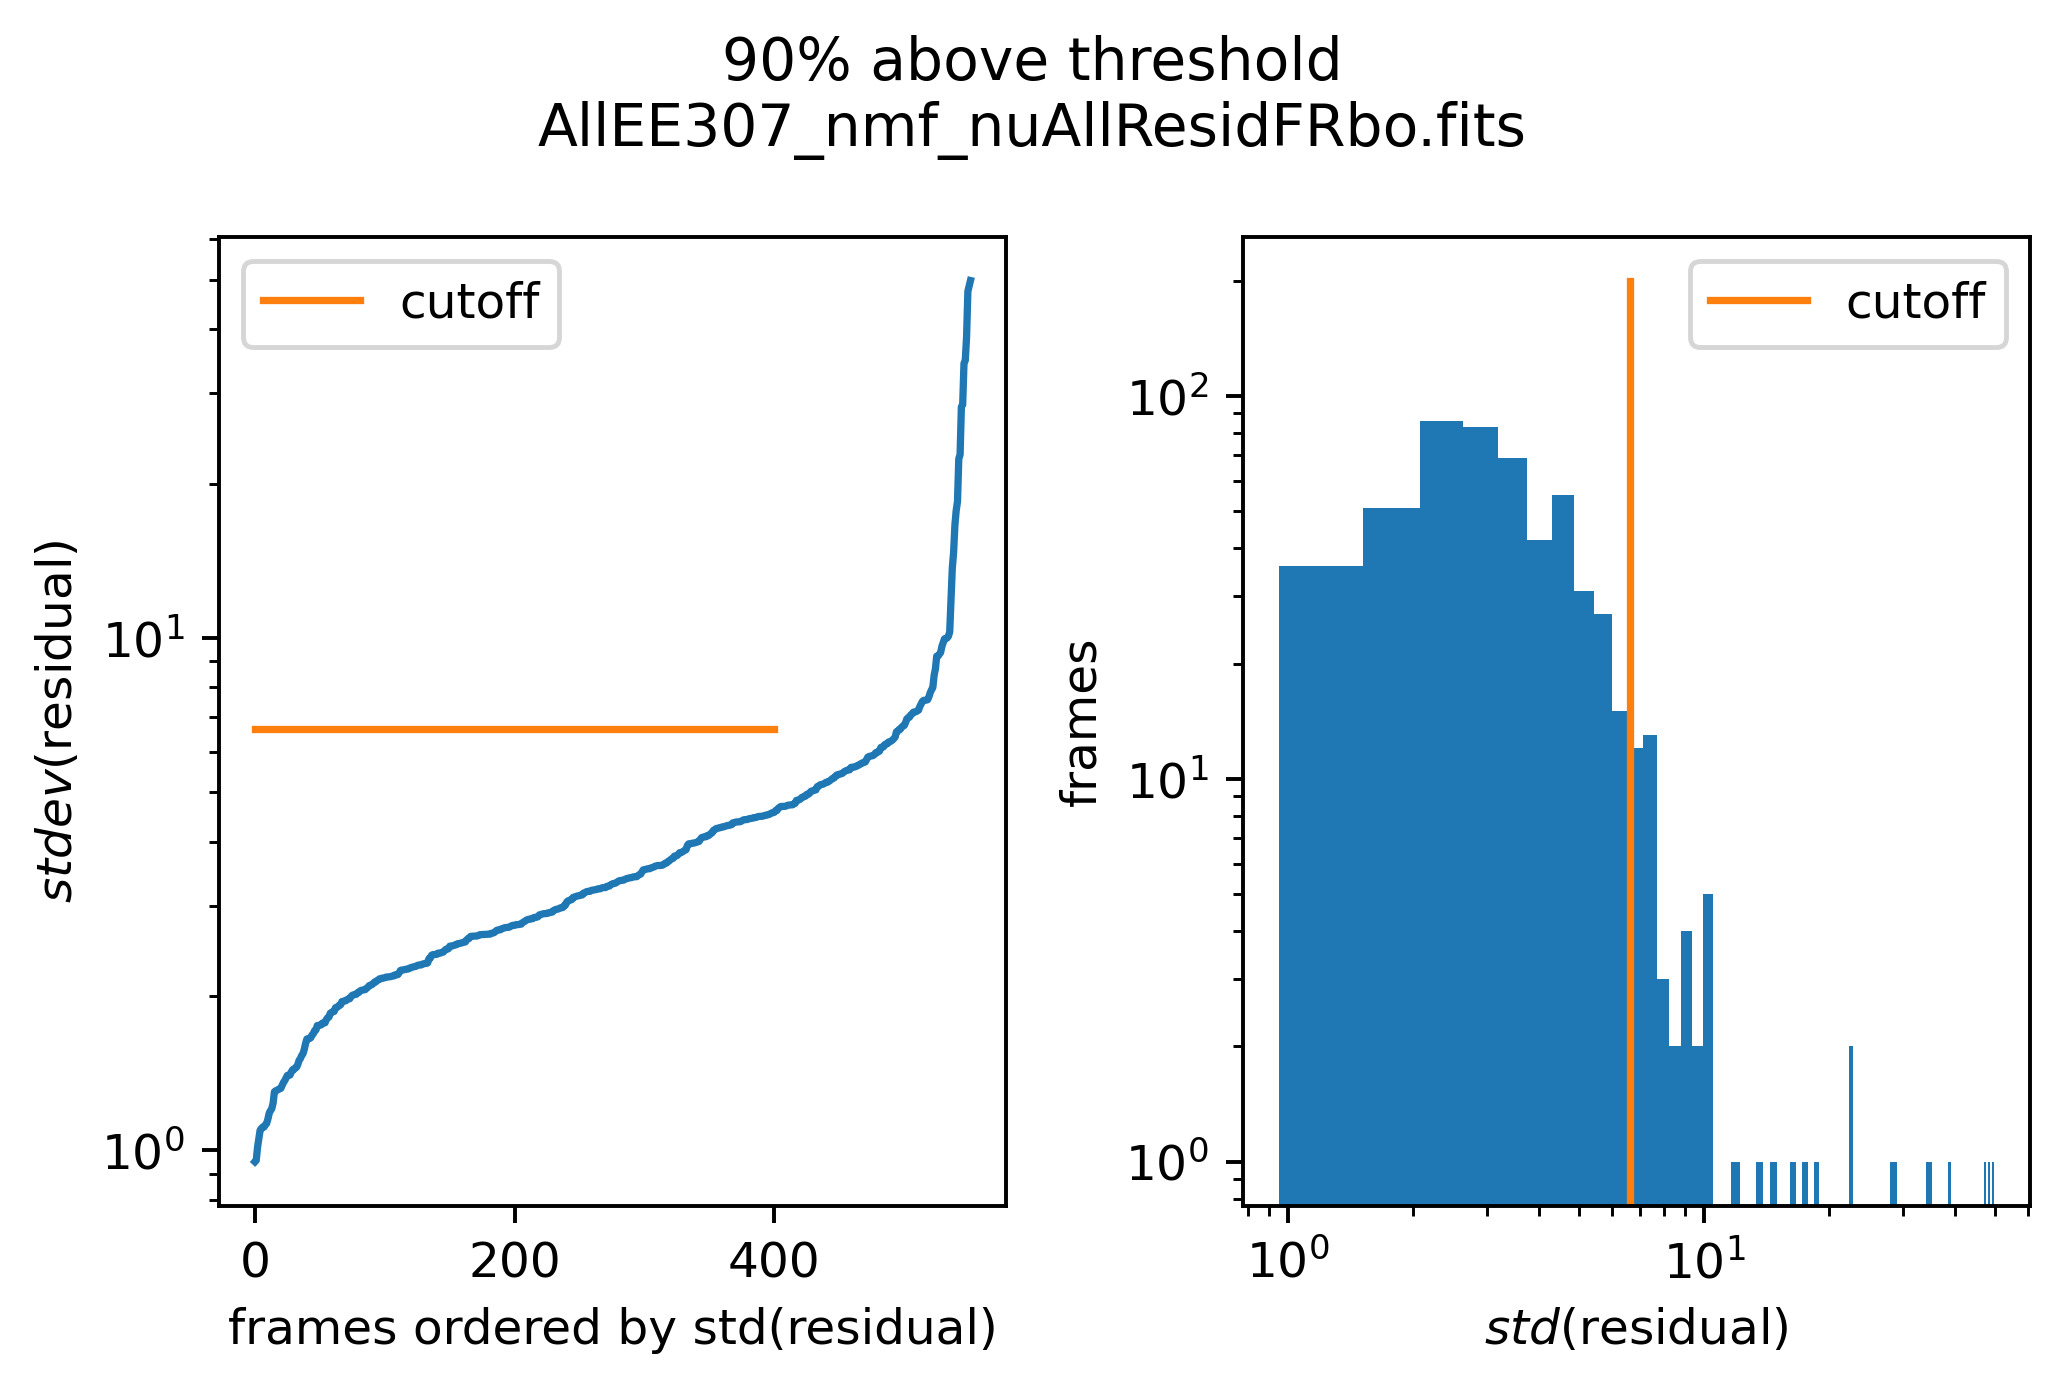

In [32]:
#hypothesis, subtracted frames should be empy
#so poorly subtracted frames are highly variable


if nmf_fn.find("no_delta") != -1:
    subtracted=nmf_cube_2019[0].data[:,164:-164:,164:-164]#-nmf_cube_2018[0].data[0,:,:]
else:
    subtracted=nmf_cube_2019[0].data[:,:,:]#164:-164:,164:-164]#-nmf_cube_2018[0].data[0,:,:]

sub_std_frm=np.nanstd(np.nanstd(subtracted,axis=2),axis=1)

sub_ordered=sub_std_frm.copy()
sub_ordered.sort()

cutoff=sub_ordered[int(round(len(sub_ordered)*.9))] #counts, %

print(cutoff)

good_frames=np.where(sub_std_frm<cutoff)[0]
print("n  frames:"+str(len(good_frames)))

good_std=np.nanstd(subtracted[good_frames,:,:],axis=0)

bad_frames=np.where(sub_std_frm>cutoff)[0]
bad_std=np.nanstd(subtracted[bad_frames,:,:],axis=0)

bfraction=np.size(bad_frames)/np.size(sub_std_frm)
bad_Median=np.nanmedian(subtracted[bad_frames,:,:],axis=0)


gfraction=np.size(good_frames)/np.size(sub_std_frm)
gfrac_str="{:.2g}".format((np.round(gfraction*100)))

plt.figure(dpi=350)
plt.subplot(121)


#plt.imshow(good_std,vmin=0,vmax=np.nanmax(bad_std),cmap=plt.cm.plasma_r,)
plt.plot(sub_ordered)


plt.plot([0,400],[cutoff,cutoff],label="cutoff")

plt.ylabel("$stdev$(residual)")
#plt.xlabel("frame")
plt.xlabel("frames ordered by std(residual)")
plt.legend()
plt.yscale("log")



plt.subplot(122)


plt.hist(sub_ordered,bins="auto")
plt.ylabel("frames")
plt.plot([cutoff,cutoff],[0,200],label="cutoff")
plt.yscale("log")

plt.xscale("log")

plt.xlabel("$std$(residual)")
plt.legend()
#plt.title("histogram of $stdev$(residual)")
plt.suptitle(gfrac_str+"% above threshold\n"+nmf_fn)
plt.tight_layout()



plt.savefig(fig_dir+"figures/ordered+cutoff"+"good_frames{}percent".format(int(np.round(gfraction*100)))\
                                                                +nmf_fn.replace("/","_")+\
                                                                ".png",
            bbox_inches="tight")

#subtracted=klip_cube_2018[0].data-klip_cube_2018[0].data[0,:,:]

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/tmp/ipykernel_9898/3607947234.py:59: RuntimeWarning: divide by zero encountered in true_divide
  plt.imshow(bad_Median/bad_std,vmin=0,vmax=2,cmap=plt.cm.plasma,)


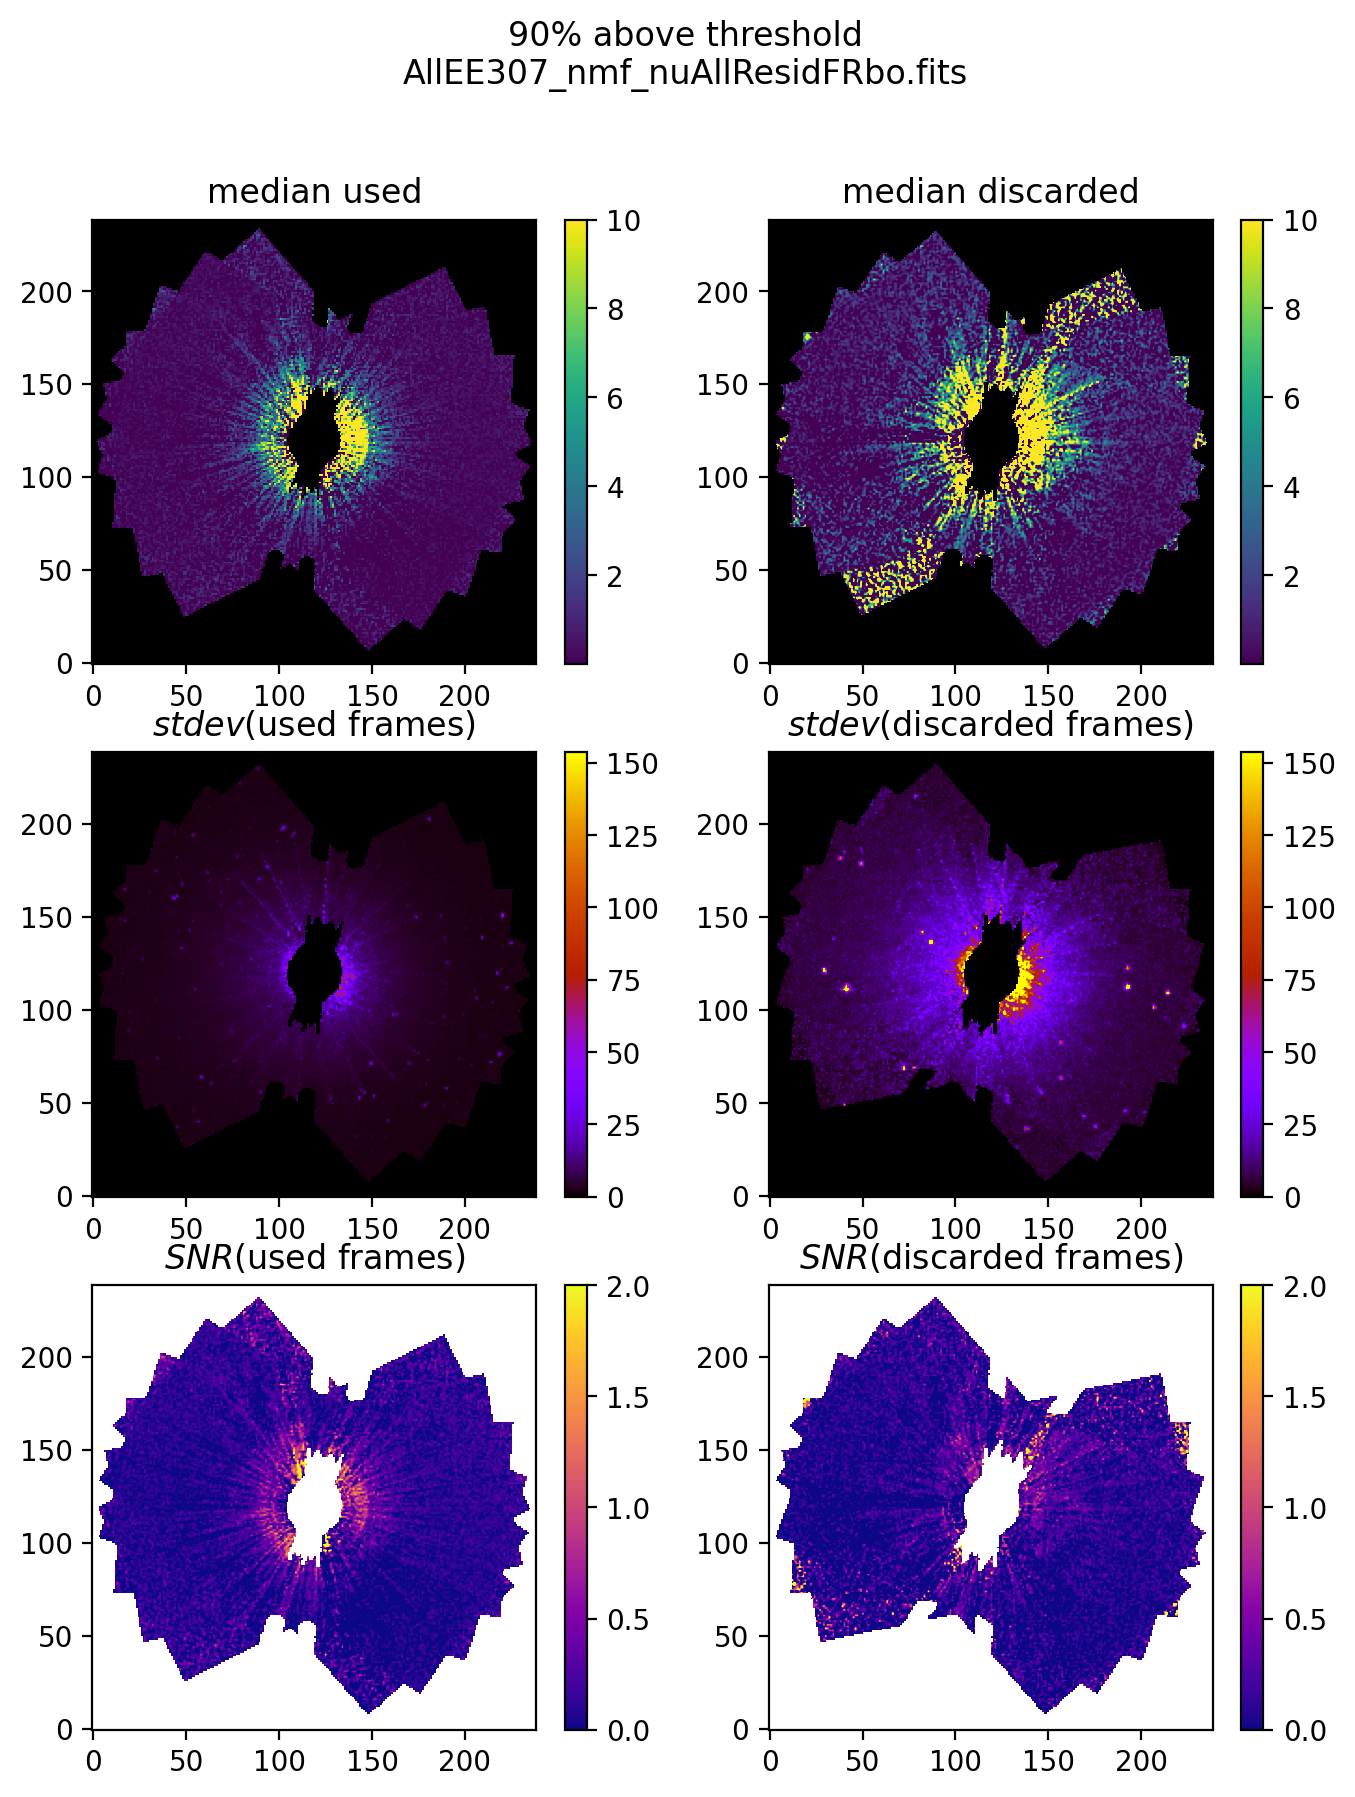

In [33]:
#cutoff=4.1 #70%

plt.figure(figsize=[8,10],dpi=200)
plt.subplot(321)

plt.suptitle(gfrac_str+"% above threshold\n"+nmf_fn)
plt.title("median used")
good_median=np.nanmedian(subtracted[good_frames,:,:],axis=0)
plt.imshow(good_median,#norm=matplotlib.colors.LogNorm(0.001,good_median.max()),
               #cmap=plt.cm.magma,
           interpolation='nearest',
              vmin=0.01,
           vmax=10)#np.nanmax(good_median))
plt.colorbar()
plt.subplot(322)
plt.title("median discarded")


plt.imshow(bad_Median,#norm=matplotlib.colors.LogNorm(0.001,good_median.max()),
           vmin=0.01,
           vmax=10
               #cmap=plt.cm.magma,
          )#np.nanmax(good_median))
fits.writeto(local_data_dir+nmf_fn.replace("/","_")
             +"good_frames{}percent.fits".format(int(np.round(gfraction*100))),
             good_median,overwrite=True)
fits.writeto(local_data_dir+nmf_fn.replace("/","_")
             +"bad_frames{}percent.fits".format(int(np.round(bfraction*100))),
             bad_Median,overwrite=True)
fits.writeto(local_data_dir+nmf_fn.replace("/","_")
             +"goodSTD_frames{}percent.fits".format(int(np.round(gfraction*100))),
             good_std,
             overwrite=True)

plt.colorbar()
plt.subplot(323)

plt.imshow(good_std,vmin=0,cmap=plt.cm.gnuplot,vmax=np.nanmax(good_median),)

plt.title("$stdev$(used frames)")

plt.colorbar()

plt.subplot(324)
plt.imshow(bad_std,vmin=0,
           vmax=np.nanmax(good_median),
           cmap=plt.cm.gnuplot)
plt.title("$stdev$(discarded frames)")
plt.colorbar()

plt.subplot(325)

plt.imshow(good_median/good_std,vmin=0,vmax=2,cmap=plt.cm.plasma,)
plt.title("$SNR$(used frames)")


plt.colorbar()
plt.subplot(326)
plt.imshow(bad_Median/bad_std,vmin=0,vmax=2,cmap=plt.cm.plasma,)
plt.title("$SNR$(discarded frames)")
plt.colorbar()
plt.savefig(fig_dir+"figures/discards_snrs"+\
            "good_frames{}percent".format(int(np.round(gfraction*100)))+\
                                           nmf_fn.replace("/","_")+".png",
            bbox_inches="tight")

In [53]:

def displ_scale(array,ps=.05*u.arcsec,
                d=None,
                ax=None,
                cmap=plt.cm.viridis,
                grid=False,
                cbar=True,
                cbar_label=None,
                xticks=None,
                **kwargs):
    if ax==None:
        ax=plt.subplot(111)
    nx = np.int(array.shape[1])
    ny= np.int(array.shape[0])
    halfpix = ps.to(u.arcsec).value*0.5
    extent = ([-(nx/2*ps).to(u.arcsec).value-halfpix,
                (nx/2*ps).to(u.arcsec).value+halfpix,
                -(ny/2*ps).to(u.arcsec).value-halfpix,
                +(ny/2*ps).to(u.arcsec).value+halfpix
              ])
    #plt.figure(figsize=[9,4])
    #plt.subplot(121)
    print(nx,ny,ps,halfpix)
    print(ax.get_xticks())
    print(extent)
        
    try:
        plt.imshow(array.decompose().value,interpolation='nearest',
                   extent=extent,cmap=cmap,**kwargs)
        print(ax.get_xticks())
    except Exception as err:
        print(err)
        plt.imshow(array,interpolation='nearest',
                   cmap=cmap,
                   extent=extent,**kwargs)
    cb=plt.colorbar(format='%.3g')
    
    try:
        if cbar_label is None:
            cb.ax.set_title(array.decompose().unit,fontsize=9)
        else:
            cb.ax.set_title(cbar_label,fontsize=9)
    except Exception as err:
        print(err)
    if grid:
        ax.grid(linewidth=0.1)
    if d is not None:
        axAU = ax.twiny()
        arcsec = ax.get_xticks()
        axAU.set_xticks((arcsec))   
        print(arcsec)
        AU=np.round(arcsec*d,1)
        print(AU)
        axAU.set_xticklabels(AU)
        #ax2.set_xticklabels(AU)
        axAU.set_xlabel("AU")
        axAU.set_xlim(np.array(ax.get_xlim()))





/tmp/ipykernel_9898/446547675.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  nx = np.int(array.shape[1])
/tmp/ipykernel_9898/446547675.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more

239 239 0.05 arcsec 0.025
[0.  0.2 0.4 0.6 0.8 1. ]
[-6.000000000000001, 6.000000000000001, -6.000000000000001, 6.000000000000001]
'numpy.ndarray' object has no attribute 'decompose'
239 239 0.05 arcsec 0.025
[0.  0.2 0.4 0.6 0.8 1. ]
[-6.000000000000001, 6.000000000000001, -6.000000000000001, 6.000000000000001]
'numpy.ndarray' object has no attribute 'decompose'


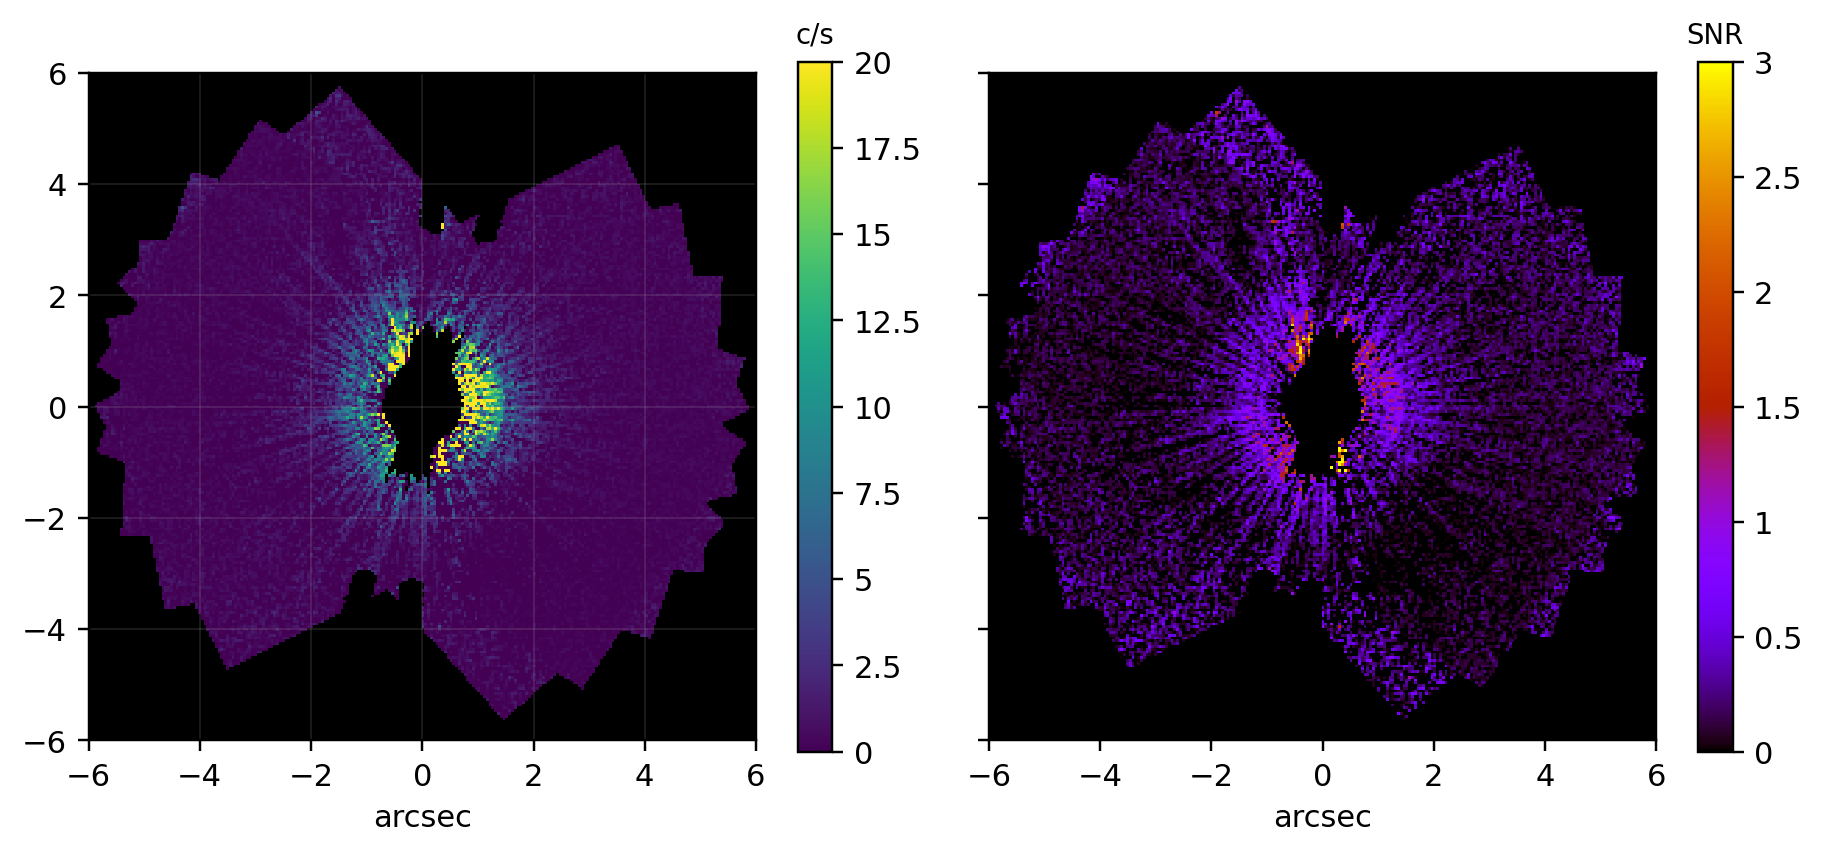

In [54]:
plt.figure(figsize=[8.5,3.8],dpi=220)
ax1=plt.subplot(122)
displ_scale(good_median/good_std,vmin=0,#vmax=2,
            grid=False,
            ax=ax1,
            #d=3.2,
            cbar_label="SNR",
            cmap=plt.cm.gnuplot,
            vmax=3,
           )#np.nanmax(good_median))
#plt.title("$SNR$(used frames)")
#plt.colorbar(label="SNR")
ax1.set_xlabel('arcsec')
ax1.set_yticklabels("")
ax=plt.subplot(121)
if nmf_fn.find("klip") != -1:
    vmin=-1
else:
    vmin=0
    
    #plt.grid()
displ_scale(good_median,#norm=matplotlib.colors.LogNorm(0.001,good_median.max()),
              vmin=0,
            grid=True,
            ax=ax,
            #d=3.2,
            cbar_label="c/s",
            
            cmap="viridis",
           vmax=20)#np.nanmax(good_median))
ax.set_xlabel('arcsec')
#plt.suptitle(nmf_fn)
plt.tight_layout()
plt.savefig(fig_dir+"figures/SNRused"+"good_frames{}percent".format(int(np.round(gfraction*100)))+\
            nmf_fn.replace("/","_")[:-5]+".pdf",bbox_inches="tight")

In [36]:
ax.get_xlim()

(-6.000000000000001, 6.000000000000001)

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


(0.1, 100)

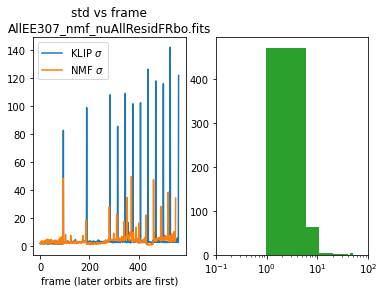

In [37]:
plt.subplot(121)
sub_std_frm=np.nanstd(np.nanstd(klip_cube_2019[0].data,axis=2),axis=1)
nmf_std_frm=np.nanstd(np.nanstd(nmf_cube_2019[0].data,axis=2),axis=1)
#plt.subplot(121)
plt.title("std vs frame\n" +nmf_fn)
plt.plot(sub_std_frm,label=r"KLIP $\sigma$")
plt.plot(nmf_std_frm,label=r"NMF $\sigma$")
plt.legend()
#plt.subplot(122)


#best_frames= [np.nanmean(np.nanmean(subtracted[sub_std_frm<cut,:,:],axis=2)) for cut in np.arange(0,6,.1) ]
#plt.plot(np.arange(0,6,.1),best_frames[:],'.')
plt.xlabel("frame (later orbits are first)")
plt.subplot(122)
plt.hist(sub_std_frm,bins='auto')
plt.hist(nmf_std_frm,bins='auto',alpha=.8)
plt.hist(sub_ordered)
plt.xscale("log")
plt.xlim(0.1,100)

In [38]:
delta[0].shape

(239,)

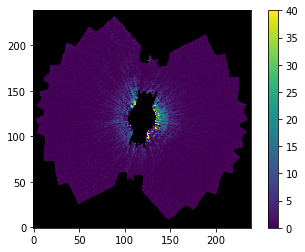

In [39]:
from astropy.stats import sigma_clip
from numpy.random import normal
from numpy import arange, diag, ones
data = arange(5) + normal(0., 0.05, (5, 5)) + diag(ones(5))
filtered_data = sigma_clip(subtracted, sigma=2, axis=0)
plt.imshow(np.mean(filtered_data,axis=0),vmax=40,vmin=0)
plt.colorbar()

In [40]:
# is 284 where the orbits switch?

/tmp/ipykernel_9898/3854970264.py:5: RuntimeWarning: Mean of empty slice
  plt.imshow(np.nanmean(subtracted[:,:,x1:x2],axis=0))#,vmax=20,vmin=-20)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/tmp/ipykernel_9898/3854970264.py:25: RuntimeWarning: Mean of empty slice
  plt.imshow(np.nanmean(subtracted[:284,:,x1:x2],axis=0))#,vmax=20,vmin=-20)


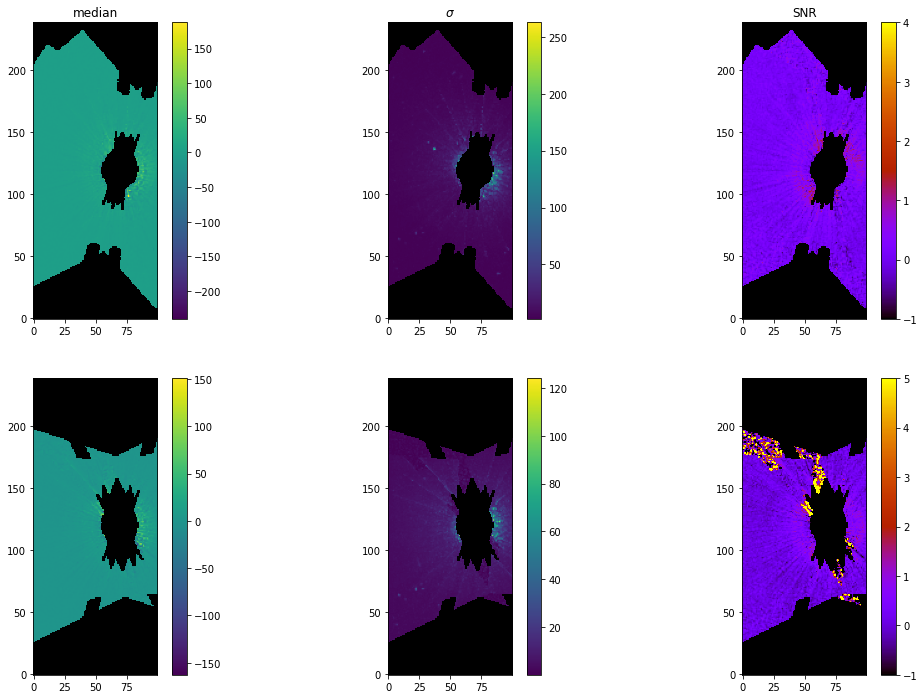

In [41]:
plt.figure(figsize=[18,12])
x1,x2=[50,150]
plt.subplot(231)
plt.title("median")
plt.imshow(np.nanmean(subtracted[:,:,x1:x2],axis=0))#,vmax=20,vmin=-20)
plt.colorbar()
plt.subplot(232)
plt.title(r"$\sigma$")
plt.imshow(np.nanstd(subtracted[:,:,x1:x2],axis=0))#,vmax=20,vmin=-20)
plt.colorbar()


plt.subplot(233)
plt.title("SNR")
plt.imshow(np.nanmedian(subtracted[:,:,x1:x2],axis=0)/np.nanstd(subtracted[:,:,x1:x2],axis=0),
           vmax=4,vmin=-1,cmap=plt.cm.gnuplot)

plt.colorbar()





plt.subplot(234)
plt.imshow(np.nanmean(subtracted[:284,:,x1:x2],axis=0))#,vmax=20,vmin=-20)
plt.colorbar()
plt.subplot(235)

plt.imshow(np.nanstd(subtracted[:284,:,x1:x2],axis=0))#,vmax=20,vmin=-20)
plt.colorbar()


plt.subplot(236)

plt.imshow(np.nanmedian(subtracted[:284,:,x1:x2],axis=0)/np.nanstd(subtracted[:284,:,x1:x2],axis=0),
           vmax=5,vmin=-1,cmap=plt.cm.gnuplot)

plt.colorbar()




In [42]:
(data_dir+nmf_fn+"good_frames{}percent.fits".format(int(np.round(gfraction*100))))

'/home/edouglas/Box/HST-EpsEri/Reduced/AllEE307_nmf_nuAllResidFRbo.fitsgood_frames90percent.fits'

In [43]:
print("test")

test


In [44]:
"figs/discards_snrs"+"good_frames{}percent"#.format(int(np.round(gfraction*100)))
#+nmf_fn.replace("/","_")+".png"

'figs/discards_snrsgood_frames{}percent'

## 